In [33]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from training.data.datasets import load_json_data
import seaborn as sns

# Data Loading
## Raw Data (used for annotation)

In [34]:
with open("data_used_for_annotation_with_chatgpt.jsonl") as f:
    raw_data = [json.loads(line) for line in f]
raw_data = pd.DataFrame(raw_data)
print(raw_data.shape)
raw_data.head()

(1974, 6)


,id,title,text,category,climate_scanner,old_id
0,0,The Shattering Truth of 3D-Printed Clothing,When the fashion trio threeASFOUR debuted its ...,3D printed apparel,True,0
1,1,Soon you may be able to 3D print clothing in y...,Three-dimensional printing has changed the way...,3D printed apparel,True,1
2,2,A clothing startup founded by MIT grads is usi...,The Insider Picks team writes about stuff we t...,3D printed apparel,True,4
3,3,3D Printing of Clothing,3D Printing of Clothing\nThe technology behind...,3D printed apparel,True,5
4,4,3D printed fashion: Why is additive manufactur...,3D printed fashion: Why is additive manufactur...,3D printed apparel,True,6


## Predictions / Annotations

In [44]:
# load predictions.jsonl from current folder
with open("predictions.jsonl") as f:
    preds = [json.loads(line) for line in f]
preds = {list(p.keys())[0]:p[list(p.keys())[0]] for p in preds}
new_rows = []
for article_id, section_predictions in preds.items():
    for section_pred in section_predictions:
        new_row = {
            "article_id": article_id,
            "article_id (old)": raw_data.iloc[int(article_id)]["old_id"],
            "section_id": section_pred["section_id"],
            "section_category": section_pred["category"],
            "article_level_category": raw_data.iloc[int(article_id)]["category"],
            "text": section_pred["text"],
            "reasoning": section_pred["reasoning"],
            "explanation": section_pred["explanation"],
        }
        new_rows.append(new_row)
predictions = pd.DataFrame(new_rows)

# Analysis of results
## Label Distribution

In [36]:
# count samples per label
predictions.section_category.value_counts()

section_category
3d_printing                                729
autonomous_transport                       397
3d_printed_apparel                         370
dematerialisation                           96
none                                        81
sustainable_fabrics                         36
train                                       28
autonomous transport                        20
circular_economy                            17
unsure                                      11
autonomous_driving                          11
clothes_designed_for_a_circular_economy      7
sustainable_fashion                          7
3D printing                                  6
autonomous_vehicles                          5
3d_printed_food                              4
new_living_concepts                          3
3D_printing                                  3
sustainable_agriculture_production           3
nanotechnology                               2
electric_car                               

Text(0.5, 1.0, 'Category distribution in annotations on the section level')

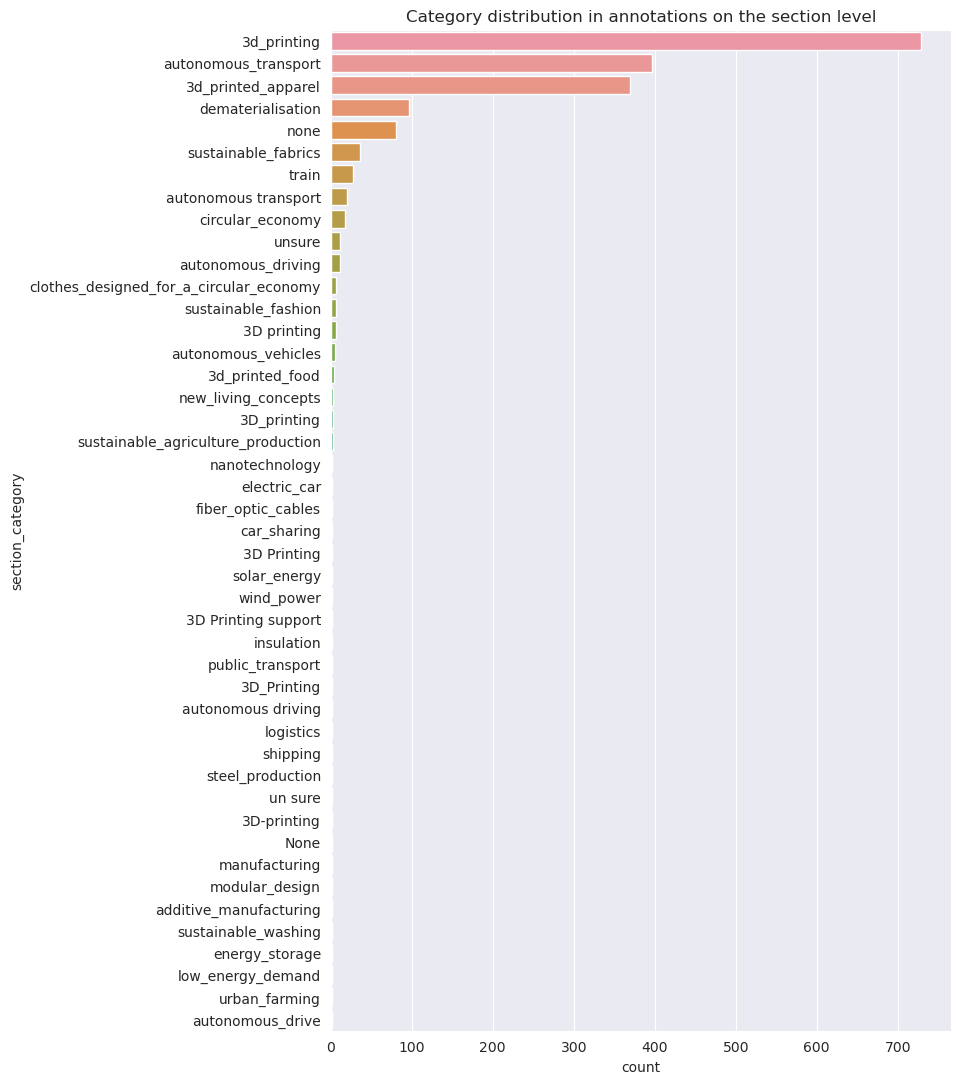

In [37]:
plt.figure(figsize=(8, 13))
sns.countplot(y="section_category", data=predictions, order = predictions.section_category.value_counts().index)
plt.title("Category distribution in annotations on the section level")

Text(0.5, 1.0, 'Category distribution on the article level in raw data')

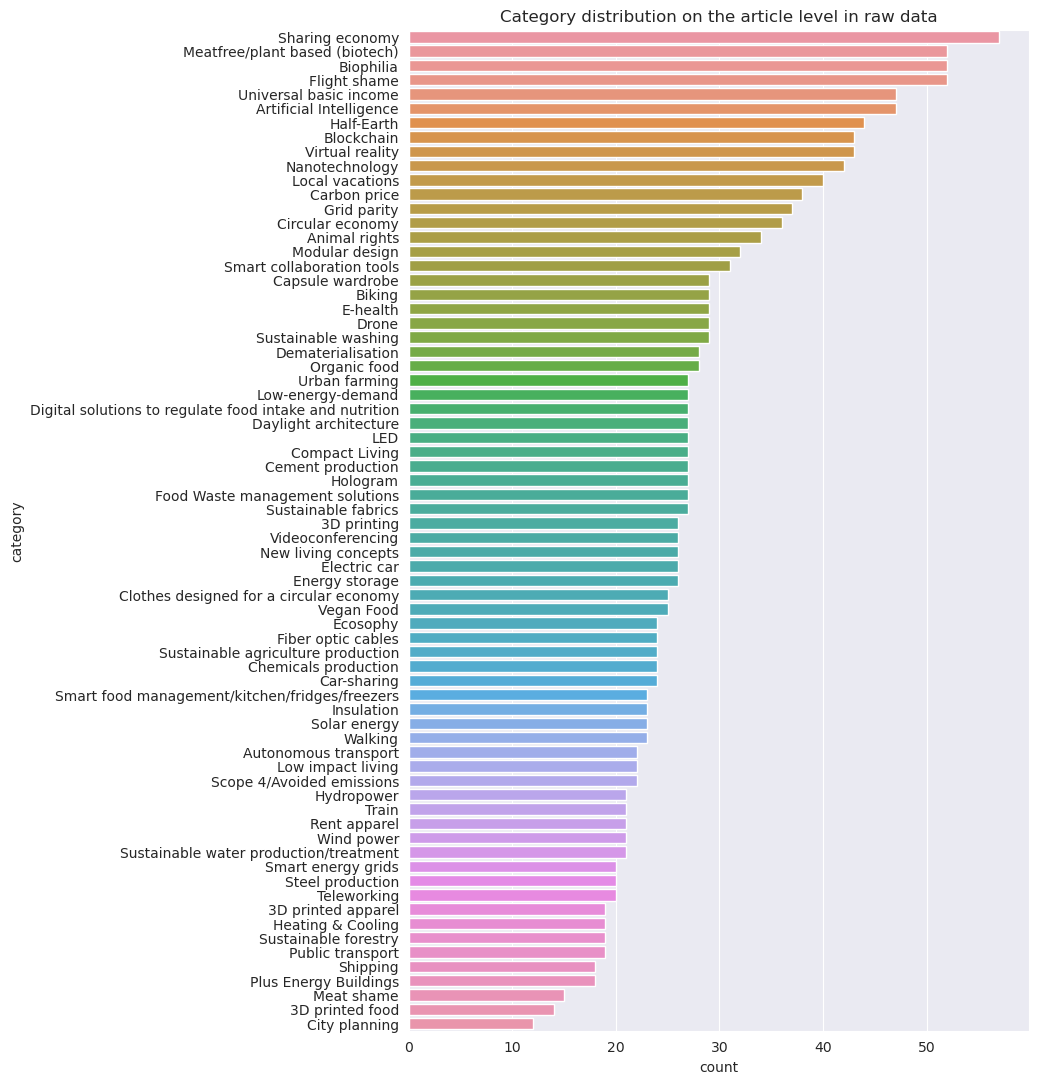

In [38]:
plt.figure(figsize=(8, 13))
sns.countplot(y="category", data=raw_data, order = raw_data.category.value_counts().index)
plt.title("Category distribution on the article level in raw data")

## Inspect "unsure" and "none" labels

In [39]:
predictions.loc[predictions.section_category.isin(["none","unsure"])]

,article_id,section_id,section_category,article_level_category,reasoning,explanation
32,2,12,none,3D printed apparel,The section does not provide specific details ...,{'1': {'prediction_1': {'category': '3d_printe...
103,6,9,none,3D printed apparel,The article segment does not explicitly mentio...,{'0': {'prediction_1': {'category': '3d_printi...
147,11,4,none,3D printed apparel,The section does not contain any specific info...,{'0': {'prediction_1': {'category': '3d_printe...
196,16,4,none,3D printed apparel,The section does not provide specific informat...,{'0': {'prediction_1': {'category': 'sustainab...
209,16,17,none,3D printed apparel,The section does not specifically mention any ...,{'1': {'prediction_1': {'category': 'clothes_d...
...,...,...,...,...,...,...
1810,48,144,unsure,Autonomous transport,The section discusses autonomous driving in th...,{'1': {'prediction_1': {'category': 'autonomou...
1821,48,155,unsure,Autonomous transport,The section contains references to academic co...,"{'1': {'prediction_1': {'category': 'unsure', ..."
1842,48,176,none,Autonomous transport,The article segment does not focus on autonomo...,{'1': {'prediction_1': {'category': 'autonomou...
1844,48,178,none,Autonomous transport,The section is specifically focused on the pol...,{'1': {'prediction_1': {'category': 'autonomou...


In [40]:
from IPython.display import Markdown
row = predictions.iloc[1355]
print(f"----- Article {row.article_id} - Section {row.section_id}")
print(f"----- Title: {raw_data.iloc[int(row.article_id)]['title']}")
print(f"----- Final category: {row.section_category}, because: {row.reasoning}")
for annotator_id, conversation in row.explanation.items():
    print(f"\nAnnotator #{annotator_id}")
    for idx, (msg_type, msg) in enumerate(conversation.items()):
        if msg_type.startswith("prediction"):
            print(f"{'-'*(idx+1)} Chosen category: {msg['category']}")
            print(f"{'-'*(idx+1)} Reasoning: {msg['reasoning']}")
        else:
            print(f"{'-'*(idx+1)} The evaluator responded and claimed the annotation as '{msg['conclusion']}'.")
            print(f"{'-'*(idx+1)} Their reasoning: {msg['reasoning']}")

----- Article 37 - Section 181
----- Title: The Influence of 3D Printing on Global Container Multimodal Transport System
----- Final category: unsure, because: The article section discusses the impact of 3D printing on the global container multimodal transport system and specifically mentions the transportation of printing filaments and finished products. It does not explicitly refer to autonomous transport, and the focus on cargo transportation and its impact on different stages of the transportation chain may not align directly with autonomous transport. Therefore, I believe that the 'unsure' category is the most appropriate choice for this section, as the content does not clearly fit into the category of autonomous transport.

Annotator #0
- Chosen category: autonomous_transport
- Reasoning: The section discusses the impact of 3D printing on the global container multimodal transport system, focusing on the transportation of printing filaments and finished products. This aligns with 

# Save data

In [45]:
# get old already annotated data
old_data = load_json_data("../../training/datasets")
old_data = old_data.rename(columns={"sentence_id": "section_id"})

In [50]:
set(old_data.article_id.values)

{0,
 1,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 54,
 55,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 67,
 68,
 71,
 72,
 73,
 76,
 77,
 80,
 82,
 83,
 84,
 86,
 87,
 88,
 89,
 91,
 93,
 95,
 96,
 97,
 98,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 128,
 129,
 148,
 150,
 154,
 156,
 158,
 159,
 160,
 162,
 163,
 165,
 166,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 177,
 178,
 181,
 182,
 183,
 184,
 186,
 193,
 194,
 196,
 198,
 199,
 200,
 201,
 206,
 207,
 208,
 299,
 300,
 301,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 333,
 334,
 335,
 338,
 339,
 341,
 342,
 343,
 344,
 345,
 346,
 350,
 351,
 352,
 361,
 362,
 363,
 364,
 365,
 366,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 381,
 424,
 426,
 428,
 429,
 431,
 432,
 434,
 436,
 438,
 439,
 442,
 446,
 447,
 448,
 450,
 451,
 664,
 666,
 667,
 669,
 671,
 672,
 673,
 675,
 676,
 677,
 679,
 681,
 682,
 683,
 684,
 685,
 686,
 687,


In [53]:
final_dataset = []
for idx, row in predictions.iterrows():
    if row["article_id (old)"] in set(old_data.article_id.values):
        # human annotation already exists, skip
        continue
    article_id = int(row.article_id)
    section_id = row.section_id
    label = row.section_category
    text = ""
    spans = []
    new_row = {
        "article_id": article_id,
        "section_id": section_id,
        "label": label,
        "text": text,
        "spans": spans
    }
    final_dataset.append(new_row)
final_dataset = pd.DataFrame(final_dataset)
print(final_dataset.shape)
final_dataset.head()

(1105, 5)


,article_id,section_id,label,text,spans
0,7,0,3d_printing,,[]
1,7,1,3d_printed_apparel,,[]
2,10,0,3d_printing,,[]
3,19,0,circular_economy,,[]
4,19,1,3d_printing,,[]


In [54]:
final_dataset = pd.concat([old_data, final_dataset])
final_dataset.head()

,text,label,spans,article_id,section_id,article_id (old)
0,J Sol. Energy Eng. April 2018; 140(2): 021012....,fiber_optic_cables,[fiber-optic],424,8,424.0
1,Energy Eng. April 2018; 140(2): 021012. https:...,fiber_optic_cables,[fiber-optic],424,9,424.0
2,April 2018; 140(2): 021012. https://doi.org/10...,fiber_optic_cables,[fiber-optic],424,10,424.0
3,"The scope included the design, development, an...",fiber_optic_cables,[fiber-optic cables],424,11,424.0
4,The designed system is comprised of two subsys...,fiber_optic_cables,"[fiber-optic cables, fiber-optic cables]",424,12,424.0


In [55]:
# save dataset to parquet
final_dataset.to_parquet("final_dataset.parquet")